In [74]:
import pandas as pd
import numpy as np
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

In [75]:
# load data
data = pd.read_csv("version_nueva.csv",sep=",",encoding="utf-8")
#Take only municipality Barcelona
data = data[data['municipality']=='Barcelona']
data = data.drop(['municipality'], axis=1)

##### 1. Price distribution

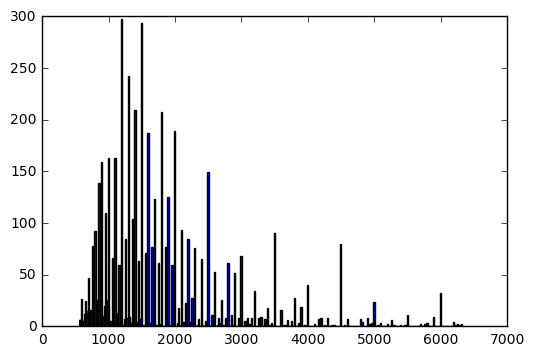

In [76]:
population=data['price']
binwidth=20
ax1=plt.hist(population, bins=np.arange(min(population),max(population) + binwidth, binwidth), facecolor='blue')
plt.show()

###### 2. Price distribution removing outliers based on percentiles

In [77]:
#remove outliers price
per=np.percentile(np.array(data['price']), [2.5, 97.5])
data2=data[data['price']>per[0]]
data2=data[data['price']<per[1]]

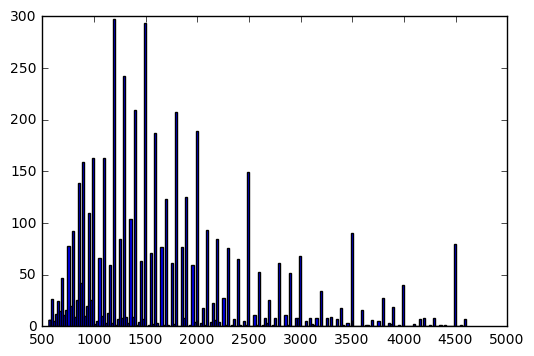

In [78]:
population=data2['price']
binwidth=20
ax1=plt.hist(population, bins=np.arange(min(population),max(population) + binwidth, binwidth), facecolor='blue')
plt.show()

###### 3. Price distribution removing outliers based on the median and error w/r the median

In [ ]:
### Code to be used in the regressor notebook. Copy/paste the function!

In [79]:
#1. Calculate the median (float)
#2. Calculate the desviation w/r the median for each flat (array)
#3. Calculate the median of this deviation (float)
#4. Calculate the rate of the two previous quantities
#5. Remove outliers considering a certain thresold from the previous magnitude

In [80]:
def price_outlier(data, thresold):
    y=data['price']
    m = np.median(y)
    abs_dev = np.abs(y - m)
    y_mad=np.median(abs_dev)
    control_var=abs_dev/y_mad
    data["control_var"]=control_var
    data = data[data['control_var']<thresold]
    data = data.drop(['control_var'], axis=1)
    return data
    
data3=price_outlier(data, 3)

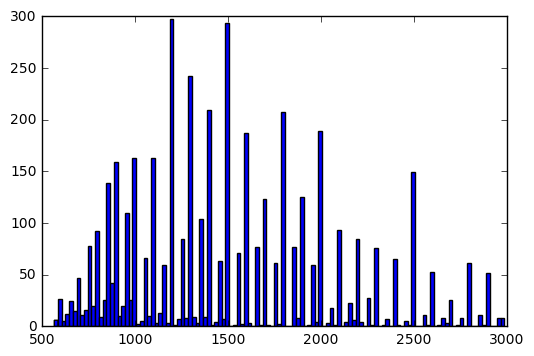

In [81]:
population=data3['price']
binwidth=20
ax1=plt.hist(population, bins=np.arange(min(population),max(population) + binwidth, binwidth), facecolor='blue')
plt.show()

In [82]:
print data.shape, min(data["price"]), max(data["price"])
print data2.shape, min(data2["price"]), max(data2["price"])
print data3.shape, min(data3["price"]), max(data3["price"])

(5385, 30) 565.0 6315.0
(5250, 29) 565.0 4600.0
(4750, 29) 565.0 2980.0
